# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zscore
from datetime import datetime

# Dataframe

## Read .csv and create dataframe

In [2]:
file_path = '/home/chad/code/ChadReich/solar_PV_forecaster/Le Wagon Solar Data v2.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Select only relevant columns from .csv
selected_columns = ['meter_id', 'tstamp', 'impwh', 'expwh', 'ptot']
new_df = df[selected_columns]
new_df

,meter_id,tstamp,impwh,expwh,ptot
0,5884,2020/11/28 16:50,59.68,1.183522e+09,-293.722
1,5884,2020/11/28 16:55,59.68,1.183546e+09,-283.052
2,5884,2020/11/28 17:00,59.68,1.183569e+09,-273.153
3,5884,2020/11/28 17:05,59.68,1.183591e+09,-263.106
4,5884,2020/11/28 17:10,59.68,1.183612e+09,-254.611
...,...,...,...,...,...
1022921,6508,2022/07/23 07:30,127407.20,1.942778e+09,-22.726
1022922,6508,2022/07/23 07:35,127407.20,1.942780e+09,-25.098
1022923,6508,2022/07/23 07:40,127407.20,1.942782e+09,-26.645
1022924,6508,2022/07/23 07:45,127407.20,1.942784e+09,-28.528


In [3]:
weather_path1 = '/home/chad/code/ChadReich/solar_PV_forecaster/Weather_Data_2.csv'
weather_path2 = '/home/chad/code/ChadReich/solar_PV_forecaster/Station_Square_6508.csv'

weather_df1 = pd.read_csv(weather_path1)
weather_df2 = pd.read_csv(weather_path2)
weather_df3 = weather_df1.append(weather_df2, ignore_index=True)

weather_df = pd.DataFrame(weather_df3)
weather_df['PeriodEnd'] = pd.to_datetime(weather_df['PeriodEnd']).dt.tz_convert(None)

weather_df.rename(columns={'PeriodEnd': 'tstamp'}, inplace=True)

weather_df

/tmp/ipykernel_11191/4194742493.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df3 = weather_df1.append(weather_df2, ignore_index=True)


,meter_id,tstamp,PeriodStart,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
0,5884,2020-11-28 16:55:00,2020-11-28T16:50:00Z,17.4,110,11.3,13.1,56,271,39,95,11.9,75.9,82,0.10
1,5884,2020-11-28 17:00:00,2020-11-28T16:55:00Z,17.3,111,14.6,13.1,53,194,25,78,11.9,76.2,83,0.10
2,5884,2020-11-28 17:05:00,2020-11-28T17:00:00Z,17.3,111,17.7,13.1,49,123,14,63,11.9,76.4,84,0.10
3,5884,2020-11-28 17:10:00,2020-11-28T17:05:00Z,17.3,112,20.8,13.1,43,58,5,49,12.0,76.5,85,0.10
4,5884,2020-11-28 17:15:00,2020-11-28T17:10:00Z,17.3,113,23.2,13.1,36,5,0,37,12.0,76.6,86,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264004,6508,2023-11-28 23:40:00,2023-11-28T23:35:00Z,16.0,-81,22.2,13.4,0,1,1,1,20.7,84.5,129,0.15
1264005,6508,2023-11-28 23:45:00,2023-11-28T23:40:00Z,16.0,-85,22.3,13.4,0,1,1,1,20.7,84.6,129,0.15
1264006,6508,2023-11-28 23:50:00,2023-11-28T23:45:00Z,16.0,-88,22.7,13.4,0,1,0,1,20.7,84.6,128,0.15
1264007,6508,2023-11-28 23:55:00,2023-11-28T23:50:00Z,16.0,-92,23.5,13.4,0,1,0,1,20.7,84.7,128,0.15


## Format dataframe

In [4]:
new_df['ptot'] = new_df['ptot'].abs()
new_df

/tmp/ipykernel_11191/2634760391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ptot'] = new_df['ptot'].abs()


,meter_id,tstamp,impwh,expwh,ptot
0,5884,2020/11/28 16:50,59.68,1.183522e+09,293.722
1,5884,2020/11/28 16:55,59.68,1.183546e+09,283.052
2,5884,2020/11/28 17:00,59.68,1.183569e+09,273.153
3,5884,2020/11/28 17:05,59.68,1.183591e+09,263.106
4,5884,2020/11/28 17:10,59.68,1.183612e+09,254.611
...,...,...,...,...,...
1022921,6508,2022/07/23 07:30,127407.20,1.942778e+09,22.726
1022922,6508,2022/07/23 07:35,127407.20,1.942780e+09,25.098
1022923,6508,2022/07/23 07:40,127407.20,1.942782e+09,26.645
1022924,6508,2022/07/23 07:45,127407.20,1.942784e+09,28.528


In [5]:
# Convert the object column to datetime
new_df['tstamp'] = pd.to_datetime(new_df['tstamp'])

# Set the timestamp column as the DataFrame index
new_df.set_index('tstamp', inplace=True)

new_df

/tmp/ipykernel_11191/1793331196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tstamp'] = pd.to_datetime(new_df['tstamp'])


,meter_id,impwh,expwh,ptot
tstamp,,,,
2020-11-28 16:50:00,5884,59.68,1.183522e+09,293.722
2020-11-28 16:55:00,5884,59.68,1.183546e+09,283.052
2020-11-28 17:00:00,5884,59.68,1.183569e+09,273.153
2020-11-28 17:05:00,5884,59.68,1.183591e+09,263.106
2020-11-28 17:10:00,5884,59.68,1.183612e+09,254.611
...,...,...,...,...
2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726
2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098
2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645


In [6]:
# Resample with a frequency of 5 minute and fill gaps with 0
resample_df = []

for meter_id in new_df['meter_id'].unique():
    # Filter the DataFrame for the current meter ID
    meter_df = new_df[new_df['meter_id'] == meter_id]

    # Resample with a frequency of 5 minutes and fill gaps with 0
    resampled_df = meter_df.resample('5T').sum().fillna(0)

    # Store the resampled DataFrame in the list
    resample_df.append(resampled_df)

df_final = pd.concat(resample_df)

# Remove specific rows at beginning of df
start_timestamp = pd.Timestamp('2020-11-28 08:25')
end_timestamp = pd.Timestamp('2020-11-28 23:55')

# Create a boolean mask to filter rows between the start and end timestamps
mask = (df_final.index < start_timestamp) | (df_final.index > end_timestamp)

# Apply the mask to the DataFrame to remove rows between the two timestamps
df_f = df_final[mask]
df_f

,meter_id,impwh,expwh,ptot
tstamp,,,,
2020-11-29 00:00:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:05:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:10:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:15:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:20:00,5884,59.68,1.183848e+09,0.000
...,...,...,...,...
2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726
2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098
2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645


In [7]:
df_f['meter_id'] = df_f['meter_id'].replace(0, method='ffill')
df_f["meter_id"].unique()

/tmp/ipykernel_11191/938801653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['meter_id'] = df_f['meter_id'].replace(0, method='ffill')


array([5884, 7672, 7657, 6508])

In [8]:
# Filter rows for the specific meter and timestamps
#mask = (df_f['meter_id'] == 5884) & (df_f.index >= '2022-12-06 20:00:00') & (df_f.index <= '2023-02-10 14:00:00')
#filtered_df = df_f.loc[mask].copy()

# Columns to update
#cols_to_update = ['impwh', 'expwh', 'ptot']

# Loop through columns and fill in missing values
#for col in cols_to_update:
 
 #   for timestamp in filtered_df.index:
 #       if filtered_df.at[timestamp, col] == 0:
            # Find corresponding previous timestamps for the previous 2 days
 #           prev_timestamps = pd.date_range(end=timestamp, periods=2, freq='D')

            # Calculate mean from the previous 2 days' timestamps
  #          mean_values = df_f.loc[prev_timestamps, col].mean()

            # Update the 0 value with the mean value
  #          filtered_df.at[timestamp, col] = mean_values

# Update the original DataFrame with the modified values
#df_f.update(filtered_df)

#df_f

In [9]:
mask = (df_f['meter_id'] == 5884) 
filtered_df = df_f.loc[mask].copy()
filtered_df

,meter_id,impwh,expwh,ptot
tstamp,,,,
2020-11-29 00:00:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:05:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:10:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:15:00,5884,59.68,1.183848e+09,0.000
2020-11-29 00:20:00,5884,59.68,1.183848e+09,0.000
...,...,...,...,...
2023-11-28 09:45:00,5884,84.80,3.407400e+09,399.850
2023-11-28 09:50:00,5884,84.80,3.407429e+09,347.072
2023-11-28 09:55:00,5884,84.80,3.407443e+09,176.836


In [10]:
start_time = '2023-01-01 07:50:00'
end_time = '2023-02-26 13:00:00'

subset_df = df_f.loc[(df_f.index >= start_time) & (df_f.index <= end_time)]

subset_df.head(60)

,meter_id,impwh,expwh,ptot
tstamp,,,,
2023-01-01 07:50:00,5884,0.0,0.0,0.0
2023-01-01 07:55:00,5884,0.0,0.0,0.0
2023-01-01 08:00:00,5884,0.0,0.0,0.0
2023-01-01 08:05:00,5884,0.0,0.0,0.0
2023-01-01 08:10:00,5884,0.0,0.0,0.0
2023-01-01 08:15:00,5884,0.0,0.0,0.0
2023-01-01 08:20:00,5884,0.0,0.0,0.0
2023-01-01 08:25:00,5884,0.0,0.0,0.0
2023-01-01 08:30:00,5884,0.0,0.0,0.0


In [11]:
#df_f=df_f[df_f.index.hour>=5]
#df_f=df_f[df_f.index.hour<=19]
#df_f

In [12]:
# Filter for summer months (November, December, January, February)
df_summer = df_f[(df_f.index.month.isin([11, 12, 1, 2])) & 
                 (df_f.index.time >= pd.to_datetime('05:00:00').time()) & 
                 (df_f.index.time <= pd.to_datetime('20:00:00').time())]

# Filter for spring and autumn (March, April, September, October)
df_aut_spring = df_f[(df_f.index.month.isin([3, 4, 9, 10])) & 
                 (df_f.index.time >= pd.to_datetime('06:00:00').time()) & 
                 (df_f.index.time <= pd.to_datetime('19:00:00').time())]

# Filter for winter months (May, June, July, August)
df_winter = df_f[(df_f.index.month.isin([5, 6, 7, 8])) & 
                 (df_f.index.time >= pd.to_datetime('06:30:00').time()) & 
                 (df_f.index.time <= pd.to_datetime('18:30:00').time())]

# Combine the DataFrames for summer, autumn, and winter
df_f = pd.concat([df_summer, df_aut_spring, df_winter])
df_f

,meter_id,impwh,expwh,ptot
tstamp,,,,
2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.000
2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.000
2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.000
2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.000
2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.000
...,...,...,...,...
2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726
2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098
2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645


## Create a label column for Power Loss Events

In [13]:
def power_loss(row):
    power_loss_values = []
    consecutive_zeros = 0
    
    for value in row:
        if value == 0:
            consecutive_zeros = consecutive_zeros + 1 # Count consecutive zeros
        #value in ptot column is non-zero
        else:
            #check the count is between 2 and 4.5 hours 
            if consecutive_zeros < 24 or consecutive_zeros > 54:
                #add 1 to the list and extend the number of entries per the count
                power_loss_values.extend([2] * consecutive_zeros)
            else:
                #add 2 to the list and extend the number of entries per the count
                power_loss_values.extend([1] * consecutive_zeros)
            
            power_loss_values.append(0) #Append 0 to indicate the end of consecutive zeros
            consecutive_zeros = 0       #Reset the count if a non-zero value is encountered

    #If the last value in 'ptot' is zero, extend 'Power Loss' with 2s or 1s based on the count
    if consecutive_zeros > 0:
        if consecutive_zeros < 24 or consecutive_zeros > 54:
            power_loss_values.extend([2] * consecutive_zeros)
        else:
            power_loss_values.extend([1] * consecutive_zeros)

    return power_loss_values #Convert the list to an int by summing its elements

df_f['Power Loss Event'] = power_loss(df_f['ptot'].to_list())

In [14]:
df_f

,meter_id,impwh,expwh,ptot,Power Loss Event
tstamp,,,,,
2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.000,2
...,...,...,...,...,...
2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726,0
2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098,0
2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645,0


In [15]:
selected_meter_id = 6508
start_timestamp = '2022-07-22 15:00:00'
end_timestamp = '2022-07-23 08:00:00'

# Filter the DataFrame based on the specified conditions
selected_data = df_f[(df_f['meter_id'] == selected_meter_id) & 
                    (df_f.index >= start_timestamp) & 
                    (df_f.index < end_timestamp)]

selected_data.head(60)

,meter_id,impwh,expwh,ptot,Power Loss Event
tstamp,,,,,
2022-07-22 15:00:00,6508,127274.40,1.942594e+09,125.948,0
2022-07-22 15:05:00,6508,127274.40,1.942610e+09,191.113,0
2022-07-22 15:10:00,6508,127274.40,1.942625e+09,180.630,0
2022-07-22 15:15:00,6508,127274.40,1.942640e+09,171.264,0
2022-07-22 15:20:00,6508,127274.40,1.942652e+09,151.503,0
2022-07-22 15:25:00,6508,127274.40,1.942664e+09,135.909,0
2022-07-22 15:30:00,6508,127274.40,1.942674e+09,124.905,0
2022-07-22 15:35:00,6508,127274.40,1.942682e+09,97.223,0
2022-07-22 15:40:00,6508,127274.40,1.942692e+09,114.787,0


In [16]:
# Create a new column 'expkWh' by dividing 'expwh' by 1000
#df_f['expkWh'] = df_f['expwh'] / 1000

year_to_extract = 2023
month_to_extract = 5  # May

one_year_data = df_f.loc[df_f.index.year == year_to_extract]
month_data = df_f.loc[(df_f.index.year == year_to_extract) & (df_f.index.month == month_to_extract)]

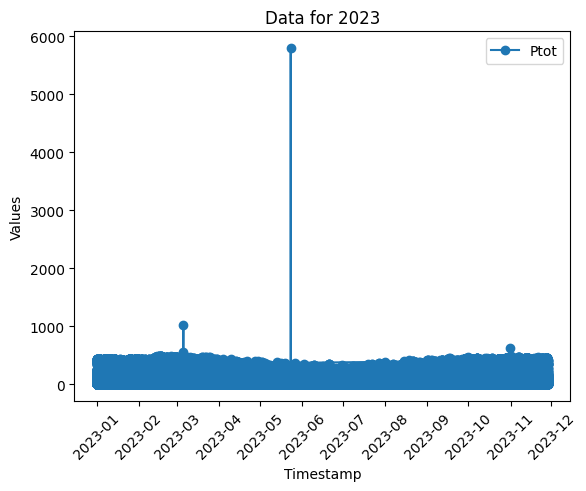

In [17]:
# Plotting
#plt.plot(month_data.index, month_data['ptot'], label='Ptot', marker='o')
plt.plot(one_year_data.index, one_year_data['ptot'], label='Ptot', marker='o')

plt.title(f'Data for {year_to_extract}')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.legend()  # Show legend for better interpretation

# Show the plot
plt.show()

In [18]:
month_data = df_f.loc[(df_f.index.year == year_to_extract) & (df_f.index.month == month_to_extract)]
    
# Calculate the mean value for 'ptot' in the specified month
mean_value = month_data['ptot'].mean()

mean_value

74.484190063033

In [19]:
def replace_outliers(df, year, month):
    
    # Extract data for the specified year and month
    specific_month_data = df.loc[(df.index.year == year) & (df.index.month == month)]

    # Calculate the mean value for 'ptot' in the specified month
    mean_value = specific_month_data['ptot'].mean()

    # Identify values 30% higher than the mean
    outliers = specific_month_data['ptot'] > 6 * mean_value

    # Replace outliers with the mean value
    specific_month_data.loc[outliers, 'ptot'] = mean_value

    return specific_month_data

In [20]:
def clean_data_for_year_range(df, start_year, end_year):
    
    cleaned_df = df.copy()
    
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):  # Iterate over all months
            cleaned_df.loc[(cleaned_df.index.year == year) & (cleaned_df.index.month == month)] = replace_outliers(df, year, month)

    return cleaned_df

In [21]:
# Clean data for the years 2020 to 2023
cleaned_data = clean_data_for_year_range(df_f, start_year=2020, end_year=2023)

In [22]:
cleaned_data

,meter_id,impwh,expwh,ptot,Power Loss Event
tstamp,,,,,
2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.000,2
2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.000,2
...,...,...,...,...,...
2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726,0
2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098,0
2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645,0


In [23]:
start_timestamp = '2023-05-23 09:00:00'
end_timestamp = '2023-05-23 14:00:00'

# Filter the DataFrame between the specified timestamps
selected_data = cleaned_data.loc[start_timestamp:end_timestamp]
selected_data.head(60)

,meter_id,impwh,expwh,ptot,Power Loss Event
tstamp,,,,,
2023-05-23 09:00:00,5884,81.76,3.070969e+09,59.793,0
2023-05-23 09:05:00,5884,81.76,3.070974e+09,67.142,0
2023-05-23 09:10:00,5884,81.76,3.070981e+09,74.198,0
2023-05-23 09:15:00,5884,81.76,3.070987e+09,82.035,0
2023-05-23 09:20:00,5884,81.76,3.070995e+09,90.384,0
2023-05-23 09:25:00,5884,81.76,3.071003e+09,98.886,0
2023-05-23 09:30:00,5884,81.76,3.071012e+09,106.541,0
2023-05-23 09:35:00,5884,81.76,3.071022e+09,114.260,0
2023-05-23 09:40:00,5884,81.76,3.071032e+09,122.377,0


In [24]:
# Choose a specific year, month, and week
chosen_year = 2022
chosen_month = 5  
chosen_week = 3

# Extract data for the chosen year and month
chosen_month_data = cleaned_data[(cleaned_data.index.year == chosen_year) & 
                                 (cleaned_data.index.month == chosen_month)]

# Extract data for the chosen week
start_date = chosen_month_data.index.min() + pd.DateOffset(weeks=chosen_week - 1)
end_date = start_date + pd.DateOffset(weeks=1)
chosen_week_data = chosen_month_data[(chosen_month_data.index >= start_date) & 
                                     (chosen_month_data.index < end_date)]

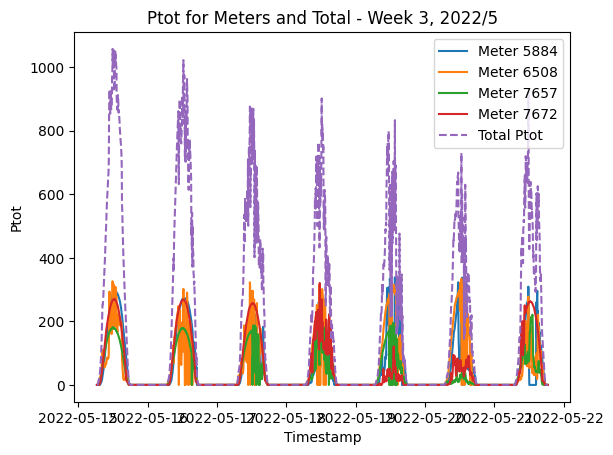

In [25]:
# Separate plots for each meter
for meter_id, meter_data in chosen_week_data.groupby('meter_id'):
    plt.plot(meter_data.index, meter_data['ptot'], label=f'Meter {meter_id}')

# Total 'ptot' plot
total_ptot = chosen_week_data.groupby(chosen_week_data.index)['ptot'].sum()
plt.plot(total_ptot.index, total_ptot, label='Total Ptot', linestyle='dashed')

# Customize the plot
plt.title(f'Ptot for Meters and Total - Week {chosen_week}, {chosen_year}/{chosen_month}')
plt.xlabel('Timestamp')
plt.ylabel('Ptot')
plt.legend()
plt.show()

In [26]:
final_df = pd.merge(cleaned_data, weather_df, on=['tstamp', 'meter_id'], how='left')

final_df

,tstamp,meter_id,impwh,expwh,ptot,Power Loss Event,PeriodStart,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
0,2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.000,2,2020-11-29T04:55:00Z,16.7,-105,0.0,11.9,58,679,190,248,14.8,73.5,74,0.10
1,2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.000,2,2020-11-29T05:00:00Z,16.7,-105,0.0,11.9,60,696,207,266,14.8,73.2,73,0.10
2,2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.000,2,2020-11-29T05:05:00Z,16.7,-104,0.0,11.9,61,713,223,285,14.8,73.1,72,0.10
3,2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.000,2,2020-11-29T05:10:00Z,16.8,-103,0.0,11.9,63,729,240,303,14.8,72.9,71,0.10
4,2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.000,2,2020-11-29T05:15:00Z,16.8,-103,0.0,11.9,65,744,258,322,14.8,72.8,70,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626012,2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726,0,2022-07-23T07:25:00Z,13.7,-45,0.0,8.1,114,678,326,440,15.0,69.3,61,0.16
626013,2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098,0,2022-07-23T07:30:00Z,14.0,-44,0.0,8.2,116,688,339,454,15.0,67.7,60,0.16
626014,2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645,0,2022-07-23T07:35:00Z,14.4,-43,0.0,8.2,116,697,352,468,15.0,66.1,60,0.16
626015,2022-07-23 07:45:00,6508,127407.20,1.942784e+09,28.528,0,2022-07-23T07:40:00Z,14.8,-42,0.0,8.2,117,706,364,482,15.0,64.6,59,0.16


In [27]:
nan_values = final_df.isnull()

# Count the number of NaN values in each column
nan_count_per_column = nan_values.sum()
nan_count_per_column 

tstamp               0
meter_id             0
impwh                0
expwh                0
ptot                 0
Power Loss Event     0
PeriodStart          0
AirTemp              0
Azimuth              0
CloudOpacity         0
DewpointTemp         0
Dhi                  0
Dni                  0
Ebh                  0
Ghi                  0
PrecipitableWater    0
RelativeHumidity     0
Zenith               0
AlbedoDaily          0
dtype: int64

In [28]:
# Assuming your DataFrame is named 'df'
# Create a boolean mask for NaN values
nan_mask = pd.isnull(final_df)

# Get the indices (row and column) where NaN values are present
nan_indices = np.where(nan_mask)

# Display the indices
print("Indices of NaN values:")
print(nan_indices)

Indices of NaN values:
(array([], dtype=int64), array([], dtype=int64))


In [29]:
project_df = final_df.dropna(axis=0, how='all').drop(columns='PeriodStart')
project_df

,tstamp,meter_id,impwh,expwh,ptot,Power Loss Event,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
0,2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.000,2,16.7,-105,0.0,11.9,58,679,190,248,14.8,73.5,74,0.10
1,2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.000,2,16.7,-105,0.0,11.9,60,696,207,266,14.8,73.2,73,0.10
2,2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.000,2,16.7,-104,0.0,11.9,61,713,223,285,14.8,73.1,72,0.10
3,2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.000,2,16.8,-103,0.0,11.9,63,729,240,303,14.8,72.9,71,0.10
4,2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.000,2,16.8,-103,0.0,11.9,65,744,258,322,14.8,72.8,70,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626012,2022-07-23 07:30:00,6508,127407.20,1.942778e+09,22.726,0,13.7,-45,0.0,8.1,114,678,326,440,15.0,69.3,61,0.16
626013,2022-07-23 07:35:00,6508,127407.20,1.942780e+09,25.098,0,14.0,-44,0.0,8.2,116,688,339,454,15.0,67.7,60,0.16
626014,2022-07-23 07:40:00,6508,127407.20,1.942782e+09,26.645,0,14.4,-43,0.0,8.2,116,697,352,468,15.0,66.1,60,0.16
626015,2022-07-23 07:45:00,6508,127407.20,1.942784e+09,28.528,0,14.8,-42,0.0,8.2,117,706,364,482,15.0,64.6,59,0.16


In [30]:
project_df=project_df.sort_values(by=['meter_id','tstamp'])

In [31]:
project_df.to_csv('solar_project_data.csv', index=False)